In [1]:
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
train_labels = pd.read_csv(r"C:\Users\Matias\Documents\datos\train_labels.csv",delimiter =',')

In [3]:
train_values = pd.read_csv(r"C:\Users\Matias\Documents\datos\train_values.csv",delimiter =',')

In [4]:
types_of_materials = train_values.loc[:,['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']]

In [5]:
types_of_materials_sum = types_of_materials.loc[:,['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']].sum()/len(types_of_materials.index)

## Se puede observar que el tipo de material mas usado en las construcciones es el mud mortar stone

In [6]:
materialesmasusaddos = train_values.loc[:,['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']].sum().sort_values(ascending = False)

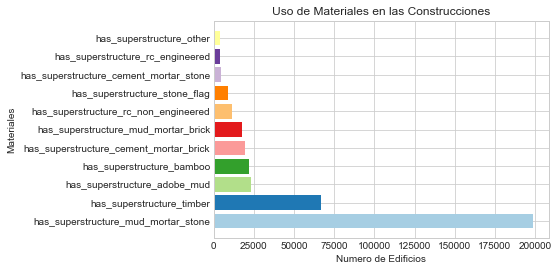

In [7]:
fig, ax = plt.subplots()

p1 = ax.barh(materialesmasusaddos.index, materialesmasusaddos,color = plt.cm.Paired(np.arange(12)))
ax.set_title('Uso de Materiales en las Construcciones')
ax.set_ylabel('Materiales')
ax.set_xlabel('Numero de Edificios')

plt.show()

In [8]:
materialesmasusadosporcentajes = (types_of_materials.loc[:,['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']].sum()/len(types_of_materials.index)).sort_values(ascending = False)

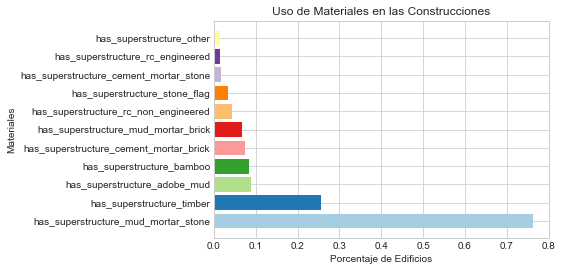

In [9]:
fig, ax = plt.subplots()

p1 = ax.barh(materialesmasusadosporcentajes.index, materialesmasusadosporcentajes,color = plt.cm.Paired(np.arange(12)))
ax.set_title('Uso de Materiales en las Construcciones')
ax.set_ylabel('Materiales')
ax.set_xlabel('Porcentaje de Edificios')

plt.show()

In [10]:
familiasporgeo = train_values.groupby('geo_level_1_id')['count_families'].sum()

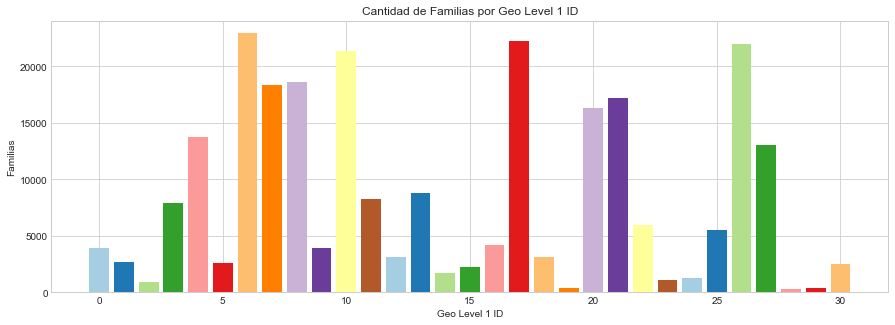

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))

p1 = ax.bar(familiasporgeo.index, familiasporgeo,color = plt.cm.Paired(np.arange(12)))
ax.set_title('Cantidad de Familias por Geo Level 1 ID')
ax.set_ylabel('Familias')
ax.set_xlabel('Geo Level 1 ID')

plt.show()

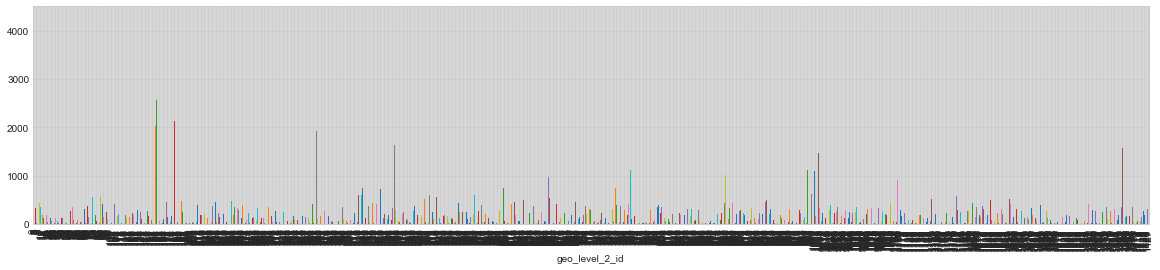

In [12]:
train_values.groupby('geo_level_2_id')['count_families'].sum().plot(kind='bar',figsize=(20, 4))

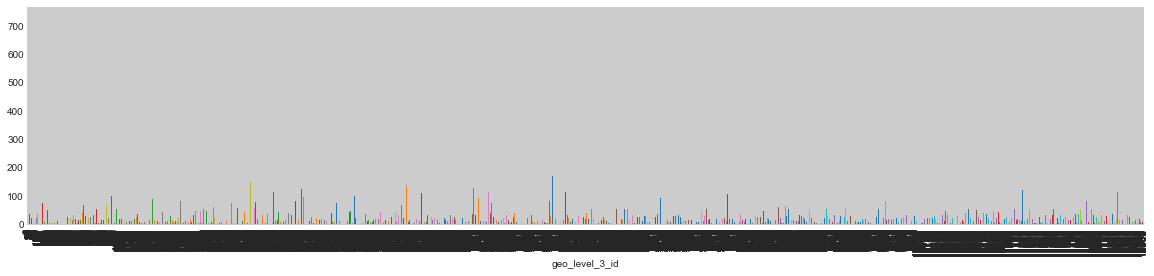

In [13]:
train_values.groupby('geo_level_3_id')['count_families'].sum().plot(kind='bar',figsize=(20, 4))

## Porcentaje de edificios con uso secundario respecto del total es del 11% aproximadamente

In [14]:
secondary_use = train_values[['has_secondary_use']]

In [15]:
secondary_use['Total'] = 1

C:\Users\Matias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
secondary_use_sum = secondary_use.sum()

In [17]:
secondary_use_sum

has_secondary_use     29156
Total                260601
dtype: int64

In [22]:
secondary_use_percentage= secondary_use.sum()/len(types_of_materials.index)

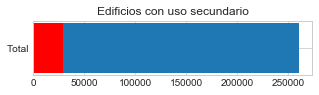

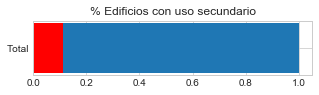

In [23]:
fig, ax = plt.subplots(figsize=(5, 1))
ax.barh('Total', secondary_use_sum.has_secondary_use, 0.35, color='red')
ax.barh('Total', secondary_use_sum.Total-secondary_use_sum.has_secondary_use,  0.35 ,left=secondary_use_sum.has_secondary_use)
ax.set_title('Edificios con uso secundario')

fig2, ax2 = plt.subplots(figsize=(5, 1))
ax2.barh('Total', secondary_use_percentage.has_secondary_use, 0.35, color = 'red')
ax2.barh('Total', secondary_use_percentage.Total-secondary_use_percentage.has_secondary_use,  0.35 ,left=secondary_use_percentage.has_secondary_use)
ax2.set_title('% Edificios con uso secundario')

plt.show()

In [ ]:
secondary_use.sum()/len(types_of_materials.index)

## Distribucion de los tipos secundarios

In [ ]:
secondary_types= (train_values.loc[train_values['has_secondary_use']==1,[
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']]).sum().sort_values(ascending = False)


In [ ]:
fig, ax = plt.subplots()

p1 = ax.barh(secondary_types.index, secondary_types,color = plt.cm.Paired(np.arange(12)))
ax.set_title('Uso de los edificios con uso secundario')
ax.set_ylabel('Uso')
ax.set_xlabel('Cantidad de Edificios')

plt.show()

## El tipo legal mas comun es "v"

In [ ]:
train_values.loc[:,['legal_ownership_status']].groupby('legal_ownership_status')['legal_ownership_status'].count().sort_values(ascending = False).plot(kind='bar')

In [ ]:

train_values.loc[:,['position']].groupby('position')['position'].count().sort_values(ascending = False).plot(kind='bar')

## La condicion de la superficie mas comun es "t"

In [ ]:

train_values.loc[:,['land_surface_condition']].groupby('land_surface_condition')['land_surface_condition'].count().sort_values(ascending = False).plot(kind='bar')


## El Cimiento mas comun es "r"

In [ ]:
train_values.loc[:,['foundation_type']].groupby('foundation_type')['foundation_type'].count().sort_values(ascending = False).plot(kind='bar')


## La condicion de la superficie del terreno mas comun es "t"

In [ ]:

train_values.loc[:,['land_surface_condition']].groupby('land_surface_condition')['land_surface_condition'].count().sort_values(ascending = False).plot(kind='bar')

## El tipo de techo mas comun es "n"

In [ ]:
train_values.loc[:,['roof_type']].groupby('roof_type')['roof_type'].count().sort_values(ascending = False).plot(kind='bar')

## Tipo de piso mas comun "q"

In [ ]:
train_values.loc[:,['other_floor_type']].groupby('other_floor_type')['other_floor_type'].count().sort_values(ascending = False).plot(kind='bar')

## Tipo de planta baja mas comun "f"

In [ ]:
train_values.loc[:,['ground_floor_type']].groupby('ground_floor_type')['ground_floor_type'].count().sort_values(ascending = False).plot(kind='bar')

## La mayoria de los edificios tienen 2 pisos

In [ ]:
train_values.loc[:,['count_floors_pre_eq']].groupby('count_floors_pre_eq')['count_floors_pre_eq'].count().sort_values(ascending = False).plot(kind='bar')

## La configuracion de plan mas comun es "d"

In [ ]:
train_values.loc[:,['plan_configuration']].groupby('plan_configuration')['plan_configuration'].count().sort_values(ascending = False).plot(kind='bar')

## La distribucion de las edades de los edificios es la siguiente

In [ ]:

train_values.loc[:,['age']].groupby('age')['age'].count().plot(kind='bar',figsize=(20, 4))


Se puede ver que la mayoria de las edificaciones rondan los 30 años de antiguedad

## Porcentajes de areas edificadas

In [ ]:
area_porcentages = train_values[['area_percentage']]

area_porcentages['total'] = 1

In [ ]:
area_porcentages.groupby('area_percentage')['total'].sum().plot(kind='bar',figsize=(20, 4))

Se puede observar que el porcentaje de area construido es bastante reducido.

## Alturas mas comunes de edificios

In [ ]:
height_porcentages = train_values[['height_percentage']]

height_porcentages['total'] = 1
height_porcentages.groupby('height_percentage')['total'].sum().plot(kind='bar',figsize=(20, 4))
 

se puede observar que las edificacionesestan por lo general por debajo de los 10 metros???

## Distribucion de edades por level ID

In [ ]:
geoidvsage = train_values.groupby(['age','geo_level_1_id'])['geo_level_1_id'].agg(['count']).reset_index()

In [ ]:
fig, ax = plt.subplots()
geoidvsage.plot(kind="scatter", x="age", y="geo_level_1_id", s=50, c="count",edgecolors = 'none', cmap="viridis", ax=ax,figsize=(20, 10),alpha =0.7,title='Distribucion de edad de edificios por posicion geografica');

aparentemente la region que contiene la mayor parte de edificios nuevos es el id 26

In [ ]:
fig, ax = plt.subplots()
geoidvsage.plot(kind="scatter", x="age", y="count", s=50, c="geo_level_1_id",edgecolors = 'none', cmap="viridis", ax=ax,figsize=(20, 10),alpha =0.7,title='Distribucion de edad de edificios por posicion geografica');

In [ ]:
fig, ax = plt.subplots()
geoidvsage.plot(kind="scatter", x="geo_level_1_id", y="age", s=50, c="count",edgecolors = 'none', cmap="viridis", ax=ax,figsize=(15, 5),alpha =0.7,title='Distribucion de edad de edificios por posicion geografica');

In [ ]:
train_values.groupby(['age','geo_level_2_id'])['geo_level_2_id'].agg(['count']).reset_index().plot.scatter(x='age', y='geo_level_2_id',c='count',colormap='viridis',figsize=(20, 4),alpha =0.7)


In [ ]:
train_values.groupby(['age','geo_level_3_id'])['geo_level_3_id'].agg(['count']).reset_index().plot.scatter(x='age', y='geo_level_3_id',c='count',colormap='viridis',figsize=(20, 4),alpha =0.7)


## Distribucion de area por posicion geografica

In [ ]:
geoidvsarea = train_values.groupby(['area_percentage','geo_level_1_id'])['geo_level_1_id'].agg(['count']).reset_index()

In [ ]:
geoid2vsarea = train_values.groupby(['area_percentage','geo_level_2_id'])['geo_level_2_id'].agg(['count']).reset_index()

In [ ]:
geoid3vsarea = train_values.groupby(['area_percentage','geo_level_3_id'])['geo_level_3_id'].agg(['count']).reset_index()

In [ ]:
fig, ax = plt.subplots()
geoidvsarea.plot(kind="scatter", x="area_percentage", y="geo_level_1_id", s=50, c="count", cmap="viridis", ax=ax,figsize=(20, 10),alpha =0.7,edgecolors = 'none',title='Distribucion de area de edificios por posicion geografica');

## Distribucion de altura por posicion 

In [ ]:
geoidvsaltura = train_values.groupby(['height_percentage','geo_level_1_id'])['geo_level_1_id'].agg(['count']).reset_index()

In [ ]:
fig, ax = plt.subplots()
geoidvsaltura.plot(kind="scatter", x="height_percentage", y="geo_level_1_id", s=50, c="count", cmap="viridis", ax=ax,figsize=(20, 10),alpha =0.7,edgecolors = 'none',title='Distribucion de altura de edificios por posicion geografica');

In [ ]:
geoidvspisos = train_values.groupby(['count_floors_pre_eq','geo_level_1_id'])['geo_level_1_id'].agg(['count']).reset_index()

In [ ]:
fig, ax = plt.subplots()
geoidvspisos.plot(kind="scatter", x="count_floors_pre_eq", y="geo_level_1_id", s=50, c="count", cmap="viridis", ax=ax,figsize=(20, 10),alpha =0.7,edgecolors = 'none',title='Distribucion de pisos de edificios por posicion geografica');

## Age VS pos 

In [ ]:
table = pd.pivot_table(geoidvsage, values='count', index=['geo_level_1_id'],
                    columns=['age'], aggfunc=np.sum,fill_value=0)

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
im = ax.imshow(table,cmap= 'viridis')
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(table.columns)))
ax.set_yticks(np.arange(len(table.index)))

ax.set_xticklabels(table.columns)
ax.set_yticklabels(table.index)
ax.invert_yaxis()
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Edades por Geo Level 1 ID")
ax.set_ylabel('Geo Level 1 ID')
ax.set_xlabel('Edad')
fig.tight_layout()
plt.show()

## Materiales vs pos

In [ ]:
table2 = train_values.loc[:,['geo_level_1_id','has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']].groupby('geo_level_1_id').sum().T

In [ ]:
fig2, ax2 = plt.subplots(figsize=(20, 6))
im = ax2.imshow(table2,cmap= 'viridis')
cbar = ax2.figure.colorbar(im, ax=ax2)
ax2.set_xticks(np.arange(len(table2.columns)))
ax2.set_yticks(np.arange(len(table2.index)))

ax2.set_xticklabels(table2.columns)
ax2.set_yticklabels(table2.index)
ax2.set_title("Materials by Geo Level 1 ID")
ax2.set_ylabel('Materiales')
ax2.set_xlabel('Geo Level 1 ID')
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig2.tight_layout()
plt.show()